<div style="display: flex; text-align:center; background-color: rgb(153,102,153);" >
<h1 style="margin: auto; padding: 30px; ">Analysez les ventes d'une librairie avec Python <br>
</h1>

<div style="display: flex; text-align:center; background-color: rgb(153,102,153);" >
<h1 style="margin: auto; padding: 30px; ">Partie 1 - Nettoyage <br></h1>

# Scénario

Je suis consultant Data Analyst chez Lapage, une librairie généraliste réputée, qui fait de la vente en ligne depuis 2 ans. 

Je suis ratachée au service Marketing

Mes missions :
 
 - Analyse des indicateurs de vente
 - Analyse des comportements clients en ligne pour les comparer à la vente des librairies physiques.

 <div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">1 - Importation des librairies et fichiers</h2>

In [1]:
import pandas as pd
import numpy as np
import datetime as datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customers = pd.read_csv("customers.csv")
products = pd.read_csv("products.csv")
transactions = pd.read_csv("transactions.csv")

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">2 - Nettoyage </h2>

Méthodologie : 
- Premier visuel : head(), shape, dtypes...
- Validation des PK : nunique()...
- Recherche erreur de valeur : unique(), min(), max()...
- Recherche et modification des doublons : duplicated()...
- Recherche et modification des valeurs manquantes : isna(), fillna()...

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 10px; color: RGB(51,165,182); ">2.1- customers </h3>

In [3]:
customers.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [4]:
print(customers.shape)
print(customers.dtypes)

(8623, 3)
client_id    object
sex          object
birth         int64
dtype: object


In [5]:
#Vérif PK --> client_id
print(customers['client_id'].nunique())
print(customers['client_id'].nunique() == customers.shape[0])

8623
True


## Nettoyage

In [6]:
print(customers['client_id'].duplicated().sum())
print(customers.isna().sum())

0
client_id    0
sex          0
birth        0
dtype: int64


In [7]:
customers['sex'].value_counts()

f    4491
m    4132
Name: sex, dtype: int64

In [8]:
# Les clients les plus âgés = 93 ans et les moins âgés = 18 ans
customers.groupby('birth')['client_id'].count()

birth
1929      3
1930      4
1931      4
1932      6
1933      8
       ... 
2000    136
2001    129
2002    146
2003    146
2004    440
Name: client_id, Length: 76, dtype: int64

In [9]:
customers['client_id'].unique().tolist()

['c_4410',
 'c_7839',
 'c_1699',
 'c_5961',
 'c_5320',
 'c_415',
 'c_285',
 'c_160',
 'c_6446',
 'c_6866',
 'c_1013',
 'c_4389',
 'c_1375',
 'c_2998',
 'c_2322',
 'c_4701',
 'c_8203',
 'c_5019',
 'c_6616',
 'c_7049',
 'c_4710',
 'c_7900',
 'c_6245',
 'c_4279',
 'c_3692',
 'c_1361',
 'c_2487',
 'c_6884',
 'c_1466',
 'c_3213',
 'c_5152',
 'c_539',
 'c_4799',
 'c_1685',
 'c_3001',
 'c_7548',
 'c_3654',
 'c_459',
 'c_3991',
 'c_3477',
 'c_5361',
 'c_125',
 'c_4313',
 'c_1046',
 'c_5633',
 'c_169',
 'c_1303',
 'c_329',
 'c_3473',
 'c_3424',
 'c_2098',
 'c_8413',
 'c_4223',
 'c_1136',
 'c_5110',
 'c_3023',
 'c_7675',
 'c_6071',
 'c_344',
 'c_7384',
 'c_3512',
 'c_6699',
 'c_2167',
 'c_2253',
 'c_5139',
 'c_5138',
 'c_7255',
 'c_4575',
 'c_6673',
 'c_3060',
 'c_3662',
 'c_3081',
 'c_7391',
 'c_3710',
 'c_5422',
 'c_651',
 'c_3598',
 'c_939',
 'c_1783',
 'c_5050',
 'c_5445',
 'c_6809',
 'c_8349',
 'c_3196',
 'c_4505',
 'c_181',
 'c_7921',
 'c_7946',
 'c_6312',
 'c_1615',
 'c_4767',
 'c_4398',


In [10]:
customers.describe(include='all')

,client_id,sex,birth
count,8623,8623,8623.000000
unique,8623,2,NaN
top,c_4410,f,NaN
freq,1,4491,NaN
mean,NaN,NaN,1978.280877
std,NaN,NaN,16.919535
min,NaN,NaN,1929.000000
25%,NaN,NaN,1966.000000
50%,NaN,NaN,1979.000000
75%,NaN,NaN,1992.000000


On voit qu'on a plus de femme que d'hommes, les plus jeunes sont nés en 2004, les plus âgés en 1929, moyenne d'âge 1978 soit 43 ans....

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 10px; color: RGB(51,165,182); ">2.2- products </h3>

In [11]:
products.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [12]:
print(products.shape)
print(products.dtypes)

(3287, 3)
id_prod     object
price      float64
categ        int64
dtype: object


In [13]:
#Vérif PK --> id_prod
print(products['id_prod'].nunique())
print(products['id_prod'].nunique() == products.shape[0])

3287
True


## Nettoyage

In [14]:
print(products['id_prod'].duplicated().sum())
print(products.isna().sum())

0
id_prod    0
price      0
categ      0
dtype: int64


In [15]:
print(products["price"].min())
print(products["price"].max())

-1.0
300.0


In [16]:
# On peut pas avoir des prix en nég et ça ne semble pas être un vrai pdt car T_0
products[products["price"] == -1]

,id_prod,price,categ
731,T_0,-1.0,0


In [17]:
# Suppression :
products.drop(731, axis=0, inplace=True)

In [18]:
# La on touche pas, on verra plus tard
products.loc[products["price"] == 300]

,id_prod,price,categ
947,2_2,300.0,2


In [19]:
# On a 3 catégories différentes et les pdts commencent par 0 1 ou 2 selon la catégorie à laquelle ils sont associés
products["categ"].unique()

array([0, 1, 2], dtype=int64)

In [20]:
# Visu du nb de produits par categ
products['categ'].value_counts().sort_values(ascending=False)

0    2308
1     739
2     239
Name: categ, dtype: int64

In [21]:
categ0 = products.loc[products['categ'] == 0]
categ0

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
4,0_1507,3.99,0
5,0_1163,9.99,0
...,...,...,...
3280,0_1314,20.63,0
3281,0_607,14.99,0
3283,0_146,17.14,0
3284,0_802,11.22,0


In [22]:
# Les prix vont de 62c a 41E
categ0["price"].sort_values()

2355     0.62
2272     0.62
370      0.66
1211     0.77
1530     0.80
        ...  
569     37.99
2663    37.99
1360    39.58
2809    39.99
47      40.99
Name: price, Length: 2308, dtype: float64

In [23]:
categ1 = products.loc[products['categ'] == 1]
categ1

,id_prod,price,categ
3,1_587,4.99,1
6,1_463,36.99,1
11,1_178,51.92,1
12,1_143,9.99,1
13,1_314,9.00,1
...,...,...,...
3270,1_651,18.99,1
3272,1_272,4.55,1
3278,1_387,9.99,1
3279,1_331,55.99,1


In [24]:
# Les prix vont de 2E a 81E
categ1["price"].sort_values()

3243     2.00
2853     2.24
2496     2.64
2366     2.95
1278     2.99
        ...  
2962    72.75
2827    73.99
808     78.83
879     79.99
824     80.99
Name: price, Length: 739, dtype: float64

In [25]:
categ2 = products.loc[products['categ'] == 2]
categ2

,id_prod,price,categ
10,2_228,225.17,2
38,2_100,72.11,2
64,2_89,107.99,2
73,2_225,157.99,2
79,2_187,157.99,2
...,...,...,...
3188,2_99,84.99,2
3196,2_238,93.92,2
3267,2_101,63.99,2
3271,2_123,147.99,2


In [26]:
# Les prix vont de 31E a 300E
categ2["price"].sort_values()

3099     30.99
390      32.99
3095     32.99
770      33.99
1717     34.23
         ...  
2779    233.54
1436    236.99
394     247.22
724     254.44
947     300.00
Name: price, Length: 239, dtype: float64

On ne peut pas réellement dire que le prix est un indicateur de catégorie car tous se chevauchent. En revanche, le plus petit 62c par la cat0 et 300E pour la dernière categ.

In [27]:
products.describe(include="all")

,id_prod,price,categ
count,3286,3286.000000,3286.000000
unique,3286,NaN,NaN
top,0_1421,NaN,NaN
freq,1,NaN,NaN
mean,NaN,21.863597,0.370359
std,NaN,29.849786,0.615446
min,NaN,0.620000,0.000000
25%,NaN,6.990000,0.000000
50%,NaN,13.075000,0.000000
75%,NaN,22.990000,1.000000


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 10px; color: RGB(51,165,182); ">2.3- Transactions </h3>

In [28]:
transactions.head()

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232


In [29]:
print(transactions.shape)
print(transactions.dtypes)

(679532, 4)
id_prod       object
date          object
session_id    object
client_id     object
dtype: object


In [30]:
# Je me suis aperçue de ces lignes de test :
transactions.loc[transactions["date"].str.startswith('test_')]

,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
5138,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0
...,...,...,...,...
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
670680,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


In [31]:
# On va pouvoir les supp car ce sont des tests :
transactions.drop(transactions[transactions['id_prod'] == "T_0"].index, inplace=True)

In [32]:
# Vérif unicité pk : Vu que notre format date est en nanoseconde on va voir si on peut l'utiliser en tant que pk
print(transactions[["id_prod", 'date', 'client_id', "session_id" ]].nunique())
print(transactions["date"].nunique() == transactions.shape[0])

id_prod         3266
date          679332
client_id       8600
session_id    342315
dtype: int64
True


In [33]:
# On a 678505 lignes contre 679332 pour date
transactions.groupby(["id_prod", 'client_id', "session_id"]).count()

date
id_prod client_id session_id      
0_0     c_1004    s_908          1
        c_1011    s_167174       1
                  s_180968       1
                  s_195932       1
                  s_343439       1
...                            ...
2_99    c_5828    s_241374       1
                  s_329932       1
        c_7135    s_296127       1
                  s_310606       1
                  s_61009        1

[678505 rows x 1 columns]

In [34]:
# Ca veut dire que pour une date unique, on a 1,2 ou 3 x la mm occurence client, session et pdts (a la mm session, le client a acheté 3x le mm pdt,donc date est bien notre pk)
transactions.groupby(["id_prod", 'client_id', "session_id"]).count()['date'].unique()

array([1, 2, 3], dtype=int64)

rien qu'avec la ligne avec unique(), vu qu'il n'y a pas que des 1, ca veut dire qu'il y a des doublons voir des triplets sur ce groupement de clés.Pour la date, on a autant de dates uniques que de lignes donc c'est bien la pk.

In [35]:
# Juste pour regarder : On crée un mask où on veut retourner ttes les lignes qui sont égales à 2
mask = transactions.groupby(["id_prod", 'client_id', "session_id"]).count()['date'] == 2   
# On va afficher ts les "true"
transactions.groupby(["id_prod", 'client_id', "session_id"]).count().loc[mask]

date
id_prod client_id session_id      
0_0     c_2180    s_20639        2
        c_2867    s_7906         2
        c_7680    s_298009       2
                  s_6760         2
0_1023  c_857     s_192744       2
...                            ...
2_46    c_8597    s_44304        2
2_79    c_1865    s_123824       2
                  s_198190       2
        c_822     s_256697       2
                  s_65485        2

[823 rows x 1 columns]

In [36]:
print(transactions['date'].duplicated().sum())
print(transactions.isna().sum())

0
id_prod       0
date          0
session_id    0
client_id     0
dtype: int64


In [37]:
print(transactions['date'].max())
print(transactions['date'].min())

2023-02-28 23:58:30.792755
2021-03-01 00:01:07.843138


On constate que notre jeu de données est futuriste. 
- Nous pouvons dire pour garder toutes les données que nous sommes en mars 2023

In [38]:
transactions['id_prod'].value_counts().sort_values(ascending=False).head(5)

1_369    2252
1_417    2189
1_414    2180
1_498    2128
1_425    2096
Name: id_prod, dtype: int64

In [39]:
transactions['session_id'].value_counts().sort_values(ascending=False).head(5)

s_118668    14
s_179575    13
s_342045    13
s_96857     13
s_215292    13
Name: session_id, dtype: int64

In [40]:
transactions['client_id'].value_counts().sort_values(ascending=False).head(5)

c_1609    25488
c_6714     9187
c_3454     6773
c_4958     5195
c_3263      403
Name: client_id, dtype: int64

In [41]:
# Modification de date object en datetime
transactions['date'] = pd.to_datetime(transactions['date'])

In [42]:
transactions.describe()

C:\Users\Camil\AppData\Local\Temp/ipykernel_12256/3177449877.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  transactions.describe()


,id_prod,date,session_id,client_id
count,679332,679332,679332,679332
unique,3266,679332,342315,8600
top,1_369,2022-05-20 13:21:29.043970,s_118668,c_1609
freq,2252,1,14,25488
first,NaN,2021-03-01 00:01:07.843138,NaN,NaN
last,NaN,2023-02-28 23:58:30.792755,NaN,NaN


On sait qu'on a : 3266 id_prod uniques, 679 332 transactions uniques, 8600 client_id uniques, 342 315 session_id uniques. Le produit le plus acheté est le 1_369 (x2252), le client le plus régulier c_1609 (25 488 transactions), la session la plus active s_118668 (x14)

chaque prod_id commençant par la lettre 0,1 ou 2 correspond à la catégorie du produit.

Chaque session_id correspond à un achat et il peut y avoir plusieurs achats pour la même session

Nous sommes en mars 2023

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 10px; color: RGB(51,165,182); ">2.4- Jointures </h3>

# Merge entre customers & transactions

In [43]:
# Merge sur la clé "client_id" : 
clients = pd.merge(left= transactions, 
               right= customers, how="outer", on="client_id", indicator=True)
clients.head()

,id_prod,date,session_id,client_id,sex,birth,_merge
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,f,1986,both
1,0_1627,2022-06-18 05:55:31.816994,s_225494,c_103,f,1986,both
2,0_1104,2023-02-08 17:31:06.898425,s_338755,c_103,f,1986,both
3,0_1390,2021-04-20 06:18:39.939761,s_23078,c_103,f,1986,both
4,0_1547,2022-03-15 19:54:53.904123,s_179629,c_103,f,1986,both


In [44]:
print(clients.shape)
print(clients.dtypes)

(679355, 7)
id_prod               object
date          datetime64[ns]
session_id            object
client_id             object
sex                   object
birth                  int64
_merge              category
dtype: object


In [45]:
# vérif != de both: On a 23 clients identifiés qui n'auraient pas acheté de livre
clients_sans_achat = clients[clients["_merge"]!= "both"]
print(len(clients_sans_achat))
clients_sans_achat

23


,id_prod,date,session_id,client_id,sex,birth,_merge
679332,NaN,NaT,NaN,c_8253,f,2001,right_only
679333,NaN,NaT,NaN,c_3789,f,1997,right_only
679334,NaN,NaT,NaN,c_4406,f,1998,right_only
679335,NaN,NaT,NaN,ct_0,f,2001,right_only
679336,NaN,NaT,NaN,c_2706,f,1967,right_only
679337,NaN,NaT,NaN,c_3443,m,1959,right_only
679338,NaN,NaT,NaN,c_4447,m,1956,right_only
679339,NaN,NaT,NaN,c_3017,f,1992,right_only
679340,NaN,NaT,NaN,c_4086,f,1992,right_only
679341,NaN,NaT,NaN,c_6930,m,2004,right_only


In [46]:
clients = clients[clients["_merge"] == "both"]
clients

,id_prod,date,session_id,client_id,sex,birth,_merge
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,f,1986,both
1,0_1627,2022-06-18 05:55:31.816994,s_225494,c_103,f,1986,both
2,0_1104,2023-02-08 17:31:06.898425,s_338755,c_103,f,1986,both
3,0_1390,2021-04-20 06:18:39.939761,s_23078,c_103,f,1986,both
4,0_1547,2022-03-15 19:54:53.904123,s_179629,c_103,f,1986,both
...,...,...,...,...,...,...,...
679327,0_1509,2021-05-15 08:17:35.835342,s_34762,c_8114,m,1962,both
679328,1_152,2021-11-08 17:12:27.637349,s_116675,c_240,m,1998,both
679329,2_207,2021-06-01 04:31:16.088314,s_42418,c_305,f,1996,both
679330,1_521,2022-10-18 00:38:49.629165,s_284060,c_305,f,1996,both


In [47]:
clients.drop(["_merge"], axis=1, inplace=True)

In [48]:
print(clients.duplicated().sum())
print(clients.isna().sum())
print(clients.shape)

0
id_prod       0
date          0
session_id    0
client_id     0
sex           0
birth         0
dtype: int64
(679332, 6)


# Merge entre clients & products

In [49]:
# Merge sur la clé "id_prod" : 
rapport = pd.merge(left= clients, 
               right= products, how="outer", on="id_prod", indicator=True)
rapport.head()

,id_prod,date,session_id,client_id,sex,birth,price,categ,_merge
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,f,1986.0,4.18,0.0,both
1,0_1518,2021-07-20 13:21:29.043970,s_64849,c_103,f,1986.0,4.18,0.0,both
2,0_1518,2022-08-20 13:21:29.043970,s_255965,c_103,f,1986.0,4.18,0.0,both
3,0_1518,2021-05-09 11:52:55.100386,s_32104,c_6714,f,1968.0,4.18,0.0,both
4,0_1518,2022-05-30 01:17:07.487046,s_216118,c_6714,f,1968.0,4.18,0.0,both


In [50]:
print(rapport.shape)
print(rapport.dtypes)

(679353, 9)
id_prod               object
date          datetime64[ns]
session_id            object
client_id             object
sex                   object
birth                float64
price                float64
categ                float64
_merge              category
dtype: object


In [51]:
# Vérif right : Ici on aurait 21 pdts référencés mais pas vendus
pdts_pas_vendus = rapport[rapport["_merge"] == "right_only"]
print(len(pdts_pas_vendus))
print(pdts_pas_vendus['id_prod'].nunique())
pdts_pas_vendus

21
21


,id_prod,date,session_id,client_id,sex,birth,price,categ,_merge
679332,0_1016,NaT,NaN,NaN,NaN,NaN,35.06,0.0,right_only
679333,0_1780,NaT,NaN,NaN,NaN,NaN,1.67,0.0,right_only
679334,0_1062,NaT,NaN,NaN,NaN,NaN,20.08,0.0,right_only
679335,0_1119,NaT,NaN,NaN,NaN,NaN,2.99,0.0,right_only
679336,0_1014,NaT,NaN,NaN,NaN,NaN,1.15,0.0,right_only
679337,1_0,NaT,NaN,NaN,NaN,NaN,31.82,1.0,right_only
679338,0_1318,NaT,NaN,NaN,NaN,NaN,20.92,0.0,right_only
679339,0_1800,NaT,NaN,NaN,NaN,NaN,22.05,0.0,right_only
679340,0_1645,NaT,NaN,NaN,NaN,NaN,2.99,0.0,right_only
679341,0_322,NaT,NaN,NaN,NaN,NaN,2.99,0.0,right_only


In [52]:
# Vérif left
rapport[rapport["_merge"] == "left_only"]

,id_prod,date,session_id,client_id,sex,birth,price,categ,_merge
311747,0_2245,2021-04-22 04:57:20.090378,s_23987,c_6714,f,1968.0,NaN,NaN,left_only
311748,0_2245,2021-06-05 17:04:43.982913,s_44481,c_6714,f,1968.0,NaN,NaN,left_only
311749,0_2245,2022-04-05 17:04:43.982913,s_189669,c_6714,f,1968.0,NaN,NaN,left_only
311750,0_2245,2022-05-05 17:04:43.982913,s_204093,c_6714,f,1968.0,NaN,NaN,left_only
311751,0_2245,2022-12-05 17:04:43.982913,s_307520,c_6714,f,1968.0,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...
311963,0_2245,2021-10-19 09:32:03.667461,s_107022,c_6128,m,1986.0,NaN,NaN,left_only
311964,0_2245,2021-11-12 09:25:22.905886,s_118458,c_7416,m,1933.0,NaN,NaN,left_only
311965,0_2245,2021-08-22 08:51:27.564509,s_79102,c_6752,m,1987.0,NaN,NaN,left_only
311966,0_2245,2022-04-22 08:51:27.564509,s_197669,c_6752,m,1987.0,NaN,NaN,left_only


In [53]:
# Vérif si ces 221 lignes correspondent au pdt 0_2245 ou plusieurs pdts :
left_only = rapport.loc[(rapport["_merge"] == "left_only") & (rapport["id_prod"] == '0_2245')]
left_only

,id_prod,date,session_id,client_id,sex,birth,price,categ,_merge
311747,0_2245,2021-04-22 04:57:20.090378,s_23987,c_6714,f,1968.0,NaN,NaN,left_only
311748,0_2245,2021-06-05 17:04:43.982913,s_44481,c_6714,f,1968.0,NaN,NaN,left_only
311749,0_2245,2022-04-05 17:04:43.982913,s_189669,c_6714,f,1968.0,NaN,NaN,left_only
311750,0_2245,2022-05-05 17:04:43.982913,s_204093,c_6714,f,1968.0,NaN,NaN,left_only
311751,0_2245,2022-12-05 17:04:43.982913,s_307520,c_6714,f,1968.0,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...
311963,0_2245,2021-10-19 09:32:03.667461,s_107022,c_6128,m,1986.0,NaN,NaN,left_only
311964,0_2245,2021-11-12 09:25:22.905886,s_118458,c_7416,m,1933.0,NaN,NaN,left_only
311965,0_2245,2021-08-22 08:51:27.564509,s_79102,c_6752,m,1987.0,NaN,NaN,left_only
311966,0_2245,2022-04-22 08:51:27.564509,s_197669,c_6752,m,1987.0,NaN,NaN,left_only


Effectivement il n'y a que pour ce produit qu'on a des nan sur price et categ on va peut etre pouvoir faire quelque chose :

Il est manquant dans notre df products donc on ne peut pas savoir le prix, et ce sont les 221 lignes de transactions.

- On sait que le premier chiff de l'id pdt est sa catégorie, on va remplacer les nan categ par 0
- Pour le prix on peut faire une moyenne de la categ 0 et remplacer les nan par ce résultat

In [54]:
# remplacement par 0 pour la categ
left_only['categ'].fillna(0, inplace=True )
left_only

C:\Users\Camil\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,id_prod,date,session_id,client_id,sex,birth,price,categ,_merge
311747,0_2245,2021-04-22 04:57:20.090378,s_23987,c_6714,f,1968.0,NaN,0.0,left_only
311748,0_2245,2021-06-05 17:04:43.982913,s_44481,c_6714,f,1968.0,NaN,0.0,left_only
311749,0_2245,2022-04-05 17:04:43.982913,s_189669,c_6714,f,1968.0,NaN,0.0,left_only
311750,0_2245,2022-05-05 17:04:43.982913,s_204093,c_6714,f,1968.0,NaN,0.0,left_only
311751,0_2245,2022-12-05 17:04:43.982913,s_307520,c_6714,f,1968.0,NaN,0.0,left_only
...,...,...,...,...,...,...,...,...,...
311963,0_2245,2021-10-19 09:32:03.667461,s_107022,c_6128,m,1986.0,NaN,0.0,left_only
311964,0_2245,2021-11-12 09:25:22.905886,s_118458,c_7416,m,1933.0,NaN,0.0,left_only
311965,0_2245,2021-08-22 08:51:27.564509,s_79102,c_6752,m,1987.0,NaN,0.0,left_only
311966,0_2245,2022-04-22 08:51:27.564509,s_197669,c_6752,m,1987.0,NaN,0.0,left_only


In [55]:
# moyenne de la categ 0 : 
categ_0 = rapport.loc[rapport['categ']==0]
categ_0["price"].mean()

10.63832969498281

In [56]:
#imputation par la moyenne
left_only['price'].fillna(10.64, inplace=True )
left_only

C:\Users\Camil\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,id_prod,date,session_id,client_id,sex,birth,price,categ,_merge
311747,0_2245,2021-04-22 04:57:20.090378,s_23987,c_6714,f,1968.0,10.64,0.0,left_only
311748,0_2245,2021-06-05 17:04:43.982913,s_44481,c_6714,f,1968.0,10.64,0.0,left_only
311749,0_2245,2022-04-05 17:04:43.982913,s_189669,c_6714,f,1968.0,10.64,0.0,left_only
311750,0_2245,2022-05-05 17:04:43.982913,s_204093,c_6714,f,1968.0,10.64,0.0,left_only
311751,0_2245,2022-12-05 17:04:43.982913,s_307520,c_6714,f,1968.0,10.64,0.0,left_only
...,...,...,...,...,...,...,...,...,...
311963,0_2245,2021-10-19 09:32:03.667461,s_107022,c_6128,m,1986.0,10.64,0.0,left_only
311964,0_2245,2021-11-12 09:25:22.905886,s_118458,c_7416,m,1933.0,10.64,0.0,left_only
311965,0_2245,2021-08-22 08:51:27.564509,s_79102,c_6752,m,1987.0,10.64,0.0,left_only
311966,0_2245,2022-04-22 08:51:27.564509,s_197669,c_6752,m,1987.0,10.64,0.0,left_only


In [57]:
# On va garder tout ce qui est "both" et rajouter nos lignes : 
rapport = rapport[rapport['_merge'] == 'both']
rapport = rapport.append(left_only)
rapport

,id_prod,date,session_id,client_id,sex,birth,price,categ,_merge
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,f,1986.0,4.18,0.0,both
1,0_1518,2021-07-20 13:21:29.043970,s_64849,c_103,f,1986.0,4.18,0.0,both
2,0_1518,2022-08-20 13:21:29.043970,s_255965,c_103,f,1986.0,4.18,0.0,both
3,0_1518,2021-05-09 11:52:55.100386,s_32104,c_6714,f,1968.0,4.18,0.0,both
4,0_1518,2022-05-30 01:17:07.487046,s_216118,c_6714,f,1968.0,4.18,0.0,both
...,...,...,...,...,...,...,...,...,...
311963,0_2245,2021-10-19 09:32:03.667461,s_107022,c_6128,m,1986.0,10.64,0.0,left_only
311964,0_2245,2021-11-12 09:25:22.905886,s_118458,c_7416,m,1933.0,10.64,0.0,left_only
311965,0_2245,2021-08-22 08:51:27.564509,s_79102,c_6752,m,1987.0,10.64,0.0,left_only
311966,0_2245,2022-04-22 08:51:27.564509,s_197669,c_6752,m,1987.0,10.64,0.0,left_only


In [58]:
rapport.drop(["_merge"], axis=1, inplace=True)

In [59]:
print(rapport.duplicated().sum())
print(rapport.isna().sum())

0
id_prod       0
date          0
session_id    0
client_id     0
sex           0
birth         0
price         0
categ         0
dtype: int64


In [60]:
# Modifier birth et categ en int + remis date en datetime
rapport["birth"]=rapport["birth"].astype(int)
rapport["categ"]=rapport["categ"].astype(int)
rapport['date'] = pd.to_datetime(rapport['date'])
print(rapport.dtypes)
print(rapport.shape)

id_prod               object
date          datetime64[ns]
session_id            object
client_id             object
sex                   object
birth                  int32
price                float64
categ                  int32
dtype: object
(679332, 8)


In [61]:
# Remise des index dans le bon ordre
rapport.reset_index(inplace=True, drop=True)
rapport

,id_prod,date,session_id,client_id,sex,birth,price,categ
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,f,1986,4.18,0
1,0_1518,2021-07-20 13:21:29.043970,s_64849,c_103,f,1986,4.18,0
2,0_1518,2022-08-20 13:21:29.043970,s_255965,c_103,f,1986,4.18,0
3,0_1518,2021-05-09 11:52:55.100386,s_32104,c_6714,f,1968,4.18,0
4,0_1518,2022-05-30 01:17:07.487046,s_216118,c_6714,f,1968,4.18,0
...,...,...,...,...,...,...,...,...
679327,0_2245,2021-10-19 09:32:03.667461,s_107022,c_6128,m,1986,10.64,0
679328,0_2245,2021-11-12 09:25:22.905886,s_118458,c_7416,m,1933,10.64,0
679329,0_2245,2021-08-22 08:51:27.564509,s_79102,c_6752,m,1987,10.64,0
679330,0_2245,2022-04-22 08:51:27.564509,s_197669,c_6752,m,1987,10.64,0


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 10px; color: RGB(51,165,182); ">2.5- Amélioration df </h3>

In [62]:
#Création colonne temp de la transaction pour que ça soit plus clair et utile pour la suite
rapport['transac_year'] = pd.DatetimeIndex(rapport['date']).year
rapport['weekday'] = rapport['date'].dt.day_name() 
rapport['month'] = pd.DatetimeIndex(rapport['date']).month
rapport.dtypes
rapport

,id_prod,date,session_id,client_id,sex,birth,price,categ,transac_year,weekday,month
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,f,1986,4.18,0,2022,Friday,5
1,0_1518,2021-07-20 13:21:29.043970,s_64849,c_103,f,1986,4.18,0,2021,Tuesday,7
2,0_1518,2022-08-20 13:21:29.043970,s_255965,c_103,f,1986,4.18,0,2022,Saturday,8
3,0_1518,2021-05-09 11:52:55.100386,s_32104,c_6714,f,1968,4.18,0,2021,Sunday,5
4,0_1518,2022-05-30 01:17:07.487046,s_216118,c_6714,f,1968,4.18,0,2022,Monday,5
...,...,...,...,...,...,...,...,...,...,...,...
679327,0_2245,2021-10-19 09:32:03.667461,s_107022,c_6128,m,1986,10.64,0,2021,Tuesday,10
679328,0_2245,2021-11-12 09:25:22.905886,s_118458,c_7416,m,1933,10.64,0,2021,Friday,11
679329,0_2245,2021-08-22 08:51:27.564509,s_79102,c_6752,m,1987,10.64,0,2021,Sunday,8
679330,0_2245,2022-04-22 08:51:27.564509,s_197669,c_6752,m,1987,10.64,0,2022,Friday,4


In [63]:
#Création colonnes age puis intervalle d'âge selon comportement client (panier moyen par age)
rapport['age'] = rapport['transac_year'] - rapport['birth']
print(rapport['age'].min())
print(rapport['age'].max())

17
94


Text(0, 0.5, 'Panier moyen')

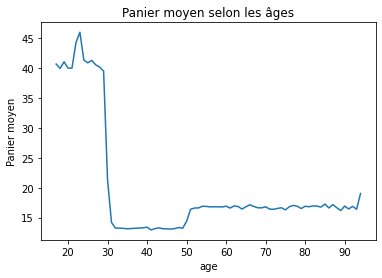

In [64]:
# Visuel panier moyen rapide mais pas précis 
plt.title('Panier moyen selon les âges')
rapport.groupby('age')['price'].mean().plot()
plt.ylabel('Panier moyen')

panier moyen par âge :
    age  price
0    17  40.65
1    18  39.91
2    19  41.03
3    20  39.97
4    21  39.97
..  ...    ...
73   90  16.93
74   91  16.45
75   92  16.89
76   93  16.40
77   94  19.03

[78 rows x 2 columns]


<AxesSubplot:xlabel='age', ylabel='price'>

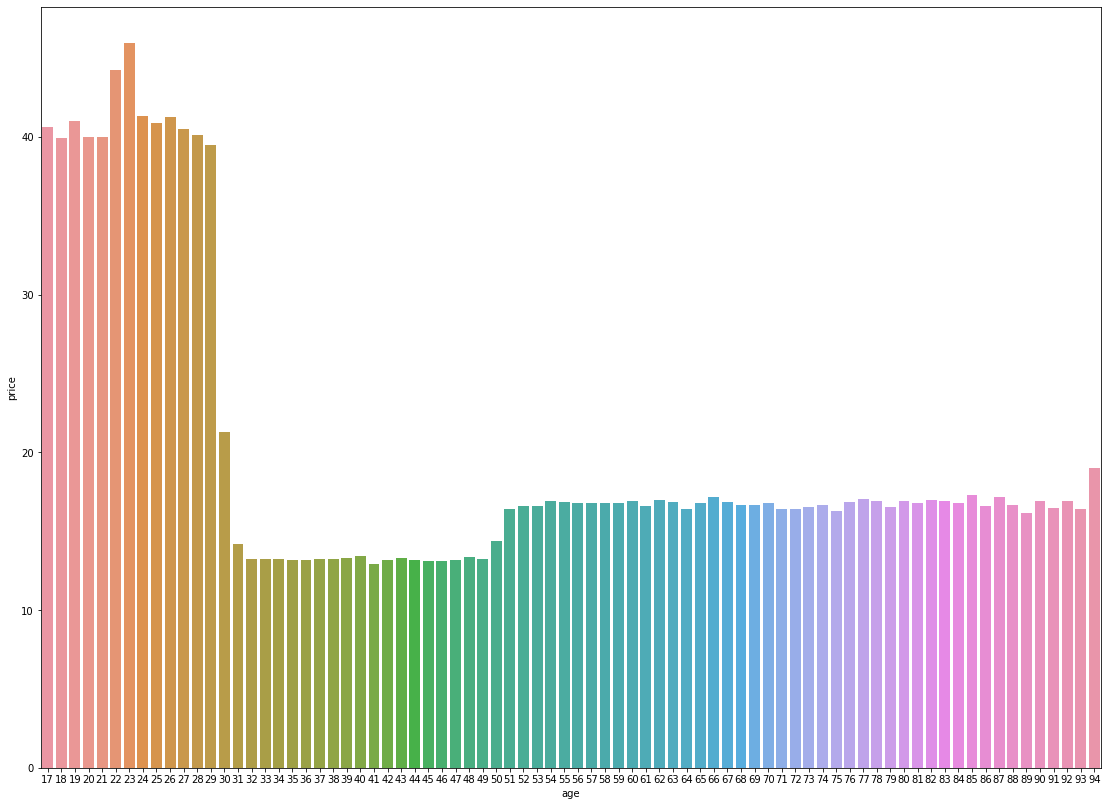

In [65]:
# Panier moyen selon l'âge en mieux
ca_age = round(rapport.groupby('age', as_index=False)['price'].mean(),2)
print("panier moyen par âge :")


print(ca_age)

plt.figure(figsize=(19,14))
sns.barplot(data=ca_age, x='age', y='price')


Les mineurs n'ont pas le droit d'acheter sur Internet avant leur majorité ou sous accord parental, émancipation. On va donc partir du principe que les personnes âgées de 17 ans en ont 18.

In [66]:
# Création des intervalles d'âge selon les données du graph :
# On a 18-30, 30-50, 50-94 (à couper en 2 car tp grand)
rapport['age'].replace(17, 18, inplace=True) 
rapport["intervalle_age"] = pd.cut(rapport['age'], bins=(18,30,50,70,95), right=False)  #right=False car on veut que le chiffre juste avant 18, 30, etc soit INCLUS
rapport['intervalle_age'].isna().sum() #Vérif tout est ok

0

In [67]:
rapport.head()

,id_prod,date,session_id,client_id,sex,birth,price,categ,transac_year,weekday,month,age,intervalle_age
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,f,1986,4.18,0,2022,Friday,5,36,"[30, 50)"
1,0_1518,2021-07-20 13:21:29.043970,s_64849,c_103,f,1986,4.18,0,2021,Tuesday,7,35,"[30, 50)"
2,0_1518,2022-08-20 13:21:29.043970,s_255965,c_103,f,1986,4.18,0,2022,Saturday,8,36,"[30, 50)"
3,0_1518,2021-05-09 11:52:55.100386,s_32104,c_6714,f,1968,4.18,0,2021,Sunday,5,53,"[50, 70)"
4,0_1518,2022-05-30 01:17:07.487046,s_216118,c_6714,f,1968,4.18,0,2022,Monday,5,54,"[50, 70)"


In [68]:
#Enregistrement d'un csv pour le réutiliser sur le prochain notebook 
rapport.to_csv('rapport.csv', index=False)